In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#We will be using Keras IMDB dataset. vocabulary size is a parameter 
#that is used the get data containing the given number of most occurring words in the entire corpus of textual data. 
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Dropout
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import csv

In [2]:
# Đọc dữ liệu từ file csv vào dataframe
df = pd.read_csv('DuLieuTinTucChungKhoan/NewsAll_Flag.csv')
df.head(20)

,date,new_content,change_flag
0,04/01/2010,"['Thị trường', 'trải', 'một', 'kỳ', 'nghỉ', 'k...",1
1,04/01/2010,"['Hiện tại', 'xử lý tài khoản', 'phụ', 'TTLK',...",1
2,04/01/2010,"['Thị trường', 'chứng khoán', 'Việt Nam', 'tro...",1
3,04/01/2010,"['Đó', 'nhận định', 'chuyên gia', 'chứng khoán...",1
4,04/01/2010,"['Đối với', 'ngành', 'điện', 'Tập đoàn', 'điện...",1
5,04/01/2010,"['Diễn biến', 'TTCK', 'trong', 'năm', 'thấy', ...",1
6,04/01/2010,"['Câu hỏi', 'đầu', 'năm', 'mới', 'đặt', 'luôn'...",1
7,04/01/2010,"['Việt Nam', '500', 'mã', 'trái phiếu', 'Chính...",1
8,04/01/2010,"['Tính', 'đến', 'ngày', '31122009', 'Trung tâm...",1
9,04/01/2010,"['Hôm nay', 'HoSE', 'nhà đầu tư', 'ngoại tiếp ...",1


In [2]:
# Đọc dữ liệu từ file csv vào dataframe
df = pd.read_csv('DuLieuTinTucChungKhoan/NewsAll_Flag.csv')
df.new_content=df.new_content.astype(str)

# Chia dữ liệu thành training set và testing set theo tỷ lệ 80-20
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Tạo bộ từ điển với 5000 từ phổ biến (5000 từ có tần xuất xuất hiện trong tập train nhiều nhất)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['new_content'])

# Chuyển đổi nội dung các câu thành dạng sequence, với mỗi từ tương ứng với chỉ số trong bộ từ điển
x_train = tokenizer.texts_to_sequences(train_df['new_content'])
x_test = tokenizer.texts_to_sequences(test_df['new_content'])

y_train = train_df['change_flag']
y_test = test_df['change_flag']

#Thêm padding cho các sequence để đảm bảo độ dài bằng nhau
max_words = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)
# Chia tập train thành 2 tập train và validation
x_valid, y_valid = x_train[:64], y_train[:64]
x_train_, y_train_ = x_train[64:], y_train[64:]
#In ra kết quả
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (39824, 500)
y_train shape: (39824,)
x_test shape: (9956, 500)
y_test shape: (9956,)


In [3]:
#*** Khai báo biến ***
embd_len = 32
vocab_size = 5000

In [13]:
#*** RNN Model ***
import time

# Creating a RNN model
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size,
						embd_len,
						input_length=max_words))

# In case of a stacked(more than one layer of RNN)
# use return_sequences=True
RNN_model.add(SimpleRNN(128,
						activation='tanh',
						return_sequences=False))
RNN_model.add(Dropout(0.2)) 
RNN_model.add(Dense(1, activation='sigmoid'))

# printing model summary
print(RNN_model.summary())

# Compiling model
RNN_model.compile(
	loss="binary_crossentropy",
	optimizer='adam',
	metrics=['accuracy']
)

start_time = time.time()

# Training the model
history = RNN_model.fit(x_train_, y_train_,
						batch_size=128,
						epochs=5,
						verbose=1,
						validation_data=(x_valid, y_valid))

end_time = time.time()
elapsed_time = end_time - start_time

# Printing model score on test data
print()
print("Simple_RNN Score---> ", RNN_model.evaluate(x_test, y_test, verbose=0))
print("Thời gian huấn luyện:", elapsed_time, "giây")

Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 32)           160000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               20608     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 180,737
Trainable params: 180,737
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
311/311 [==============================] - 68s 215ms/step - loss: 0.7121 - accuracy: 0.5134 - val_loss: 0.6526 - val_accuracy: 0.7031
Epoch 2/5
311/311 [==============

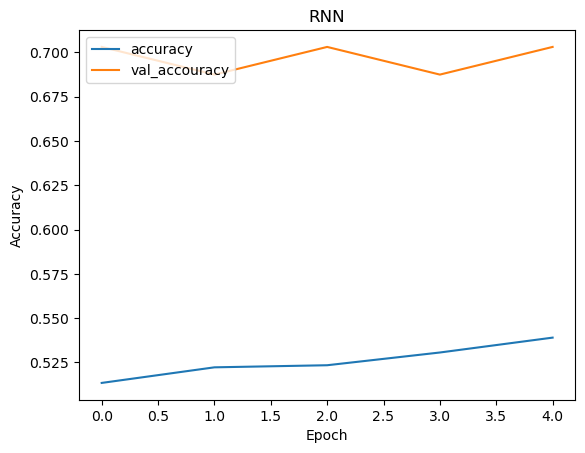

In [16]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('RNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accouracy'], loc='upper left')

# Lấy giá trị loss và accuracy từ biến history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
test_loss, test_accuracy = RNN_model.evaluate(x_test, y_test, verbose=0)

# Lưu giá trị loss và accuracy vào tệp CSV hoặc cơ sở dữ liệu
resultsh = pd.DataFrame({
    'Model_name': 'RNN1',
    'train_loss': train_loss,
    'train_accuracy': train_accuracy,
    'val_loss': val_loss,
    'val_accuracy': val_accuracy,
    'test_loss': [test_loss] * len(train_loss),  # Sử dụng len(train_loss) để lặp lại giá trị test_loss
    'test_accuracy': [test_accuracy] * len(train_accuracy),# Sử dụng len(train_accuracy) để lặp lại giá trị test_accuracy
})

resultsh.to_csv('DuLieuKQTN/KQTN.csv', index=False)

elapsed_timeh = elapsed_time
numeric_timeh = round(elapsed_timeh, 2)

TimeResult = pd.DataFrame({ 'Model_name': 'RNN1', 'elapsed_time': [numeric_timeh]})
TimeResult.to_csv('DuLieuKQTN/TimeTN.csv', index=False)



In [6]:
# Defining GRU model
gru_model = Sequential(name="GRU_Model")
gru_model.add(Embedding(vocab_size,
						embd_len,
						input_length=max_words))
gru_model.add(GRU(128,
				activation='tanh',
				return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1, activation='sigmoid'))

# Printing the Summary
print(gru_model.summary())

# Compiling the model
gru_model.compile(
	loss="binary_crossentropy",
	optimizer='adam',
	metrics=['accuracy']
)

start_time2 = time.time()
# Training the GRU model
history2 = gru_model.fit(x_train_, y_train_,
						batch_size=128,
						epochs=5,
						verbose=1,
						validation_data=(x_valid, y_valid))

end_time2 = time.time()
elapsed_time2 = end_time2 - start_time2
# Printing model score on test data
print()
print("GRU model Score---> ", gru_model.evaluate(x_test, y_test, verbose=0))
print("Thời gian huấn luyện:", elapsed_time2, "giây")

Model: "GRU_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 gru (GRU)                   (None, 128)               62208     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 222,337
Trainable params: 222,337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
311/311 [==============================] - 573s 2s/step - loss: 0.6878 - accuracy: 0.5496 - val_loss: 0.6782 - val_accuracy: 0.6094
Epoch 2/5
311/311 [=================

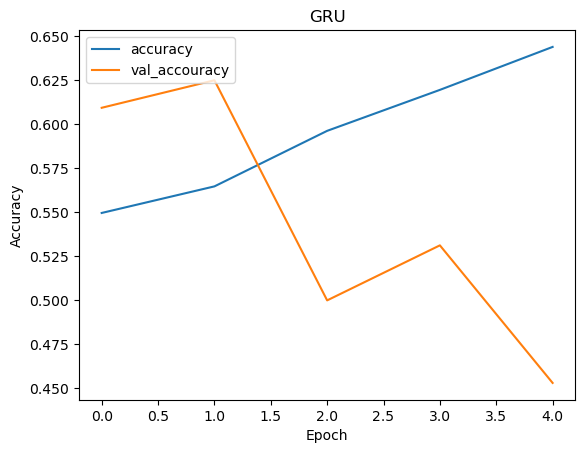

In [17]:
# plot the training and validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('GRU')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accouracy'], loc='upper left')

# Lấy giá trị loss và accuracy từ biến history
train_loss = history2.history['loss']
train_accuracy = history2.history['accuracy']
val_loss = history2.history['val_loss']
val_accuracy = history2.history['val_accuracy']
test_loss, test_accuracy = gru_model.evaluate(x_test, y_test, verbose=0)

# Lưu giá trị loss và accuracy vào tệp CSV hoặc cơ sở dữ liệu
results1 = pd.DataFrame({
    'Model_name': 'GRU',
    'train_loss': train_loss,
    'train_accuracy': train_accuracy,
    'val_loss': val_loss,
    'val_accuracy': val_accuracy,
    'test_loss': [test_loss] * len(train_loss),  # Sử dụng len(train_loss) để lặp lại giá trị test_loss
    'test_accuracy': [test_accuracy] * len(train_accuracy),  # Sử dụng len(train_accuracy) để lặp lại giá trị test_accuracy
    })

# Đọc dữ liệu cũ từ tệp CSV hoặc cơ sở dữ liệu
old_data = pd.read_csv('C:/Users/hai/DuLieuKQTN/KQTN.csv')

# Thêm dữ liệu mới vào DataFrame
new_data = pd.DataFrame(results1)

# Ghi dữ liệu mới vào tệp CSV hoặc cơ sở dữ liệu
new_data.to_csv('C:/Users/hai/DuLieuKQTN/KQTN.csv', mode='a', header=False, index=False)

#***Ghi dữ liệu thời gian huấn luyện vào csv***
# Đọc dữ liệu cũ từ tệp CSV hoặc cơ sở dữ liệu
old_time_data = pd.read_csv('C:/Users/hai/DuLieuKQTN/TimeTN.csv')

elapsed_time2 = elapsed_time2
numeric_time2 = round(elapsed_time2, 2)

# Thêm dữ liệu mới vào DataFrame
new_time_data = pd.DataFrame({
    'Model_name': 'GRU',
    'elapsed_time': [numeric_time2],})

# Ghi dữ liệu mới vào tệp CSV hoặc cơ sở dữ liệu
new_time_data.to_csv('C:/Users/hai/DuLieuKQTN/TimeTN.csv', mode='a', header=False, index=False)

In [20]:
import time
# Defining LSTM model
lstm_model = Sequential(name="LSTM_Model")
lstm_model.add(Embedding(vocab_size,
						embd_len,
						input_length=max_words))
lstm_model.add(LSTM(128,
					activation='tanh',
					return_sequences=False))
lstm_model.add(Dropout(0.2)) 
lstm_model.add(Dense(1, activation='sigmoid'))

# Printing Model Summary
print(lstm_model.summary())

# Compiling the model
lstm_model.compile(
	loss="binary_crossentropy",
	optimizer='adam',
	metrics=['accuracy']
)
start_time3 = time.time()
# Training the model
history3 = lstm_model.fit(x_train_, y_train_,
						batch_size=128,
						epochs=5,
						verbose=1,
						validation_data=(x_valid, y_valid))
end_time3 = time.time()
elapsed_time3 = end_time3 - start_time3
# Displaying the model accuracy on test data
print()
print("LSTM model Score---> ", lstm_model.evaluate(x_test, y_test, verbose=0))
print("Thời gian huấn luyện:", elapsed_time3, "giây")

Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 242,561
Trainable params: 242,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
311/311 [==============================] - 1162s 4s/step - loss: 0.6878 - accuracy: 0.5501 - val_loss: 0.6807 - val_accuracy: 0.5938
Epoch 2/5
311/311 [===============

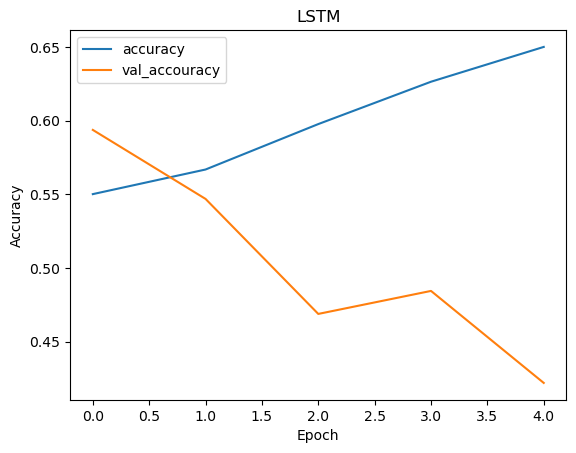

In [22]:
# plot the training and validation accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accouracy'], loc='upper left')

# Lấy giá trị loss và accuracy từ biến history
train_loss = history3.history['loss']
train_accuracy = history3.history['accuracy']
val_loss = history3.history['val_loss']
val_accuracy = history3.history['val_accuracy']
test_loss, test_accuracy = lstm_model.evaluate(x_test, y_test, verbose=0)

# Lưu giá trị loss và accuracy vào tệp CSV hoặc cơ sở dữ liệu
results2 = pd.DataFrame({
    'Model_name': 'LSTM',
    'train_loss': train_loss,
    'train_accuracy': train_accuracy,
    'val_loss': val_loss,
    'val_accuracy': val_accuracy,
    'test_loss': [test_loss] * len(train_loss),  # Sử dụng len(train_loss) để lặp lại giá trị test_loss
    'test_accuracy': [test_accuracy] * len(train_accuracy),  # Sử dụng len(train_accuracy) để lặp lại giá trị test_accuracy
    })

# Đọc dữ liệu cũ từ tệp CSV hoặc cơ sở dữ liệu
old_data = pd.read_csv('C:/Users/hai/DuLieuKQTN/KQTN.csv')

# Thêm dữ liệu mới vào DataFrame
new_data = pd.DataFrame(results2)

# Ghi dữ liệu mới vào tệp CSV hoặc cơ sở dữ liệu
new_data.to_csv('C:/Users/hai/DuLieuKQTN/KQTN.csv', mode='a', header=False, index=False)

#***Ghi dữ liệu thời gian huấn luyện vào csv***
# Đọc dữ liệu cũ từ tệp CSV hoặc cơ sở dữ liệu
old_time_data = pd.read_csv('C:/Users/hai/DuLieuKQTN/TimeTN.csv')

elapsed_time3 = elapsed_time3
numeric_time3 = round(elapsed_time3, 2)

# Thêm dữ liệu mới vào DataFrame
new_time_data = pd.DataFrame({
    'Model_name': 'LSTM',
    'elapsed_time': [numeric_time3],})

# Ghi dữ liệu mới vào tệp CSV hoặc cơ sở dữ liệu
new_time_data.to_csv('C:/Users/hai/DuLieuKQTN/TimeTN.csv', mode='a', header=False, index=False)

In [11]:
import time
# Defining Bidirectional LSTM model
bi_lstm_model = Sequential(name="Bidirectional_LSTM")
bi_lstm_model.add(Embedding(vocab_size,
							embd_len,
							input_length=max_words))
bi_lstm_model.add(Bidirectional(LSTM(128,
									activation='tanh',
									return_sequences=False)))
bi_lstm_model.add(Dropout(0.2)) 
bi_lstm_model.add(Dense(1, activation='sigmoid'))

# Printing model summary
print(bi_lstm_model.summary())

# Compiling model summary
bi_lstm_model.compile(
loss="binary_crossentropy",
optimizer='adam',
metrics=['accuracy']
)

start_time4 = time.time()
# Training the model
history4 = bi_lstm_model.fit(x_train_, y_train_,
							batch_size=128,
							epochs=5,
							verbose=1,
							validation_data=(x_test, y_test))
end_time4 = time.time()
elapsed_time4 = end_time4 - start_time4
# Printing model score on test data
print()
print("Bidirectional LSTM model Score---> ",
	bi_lstm_model.evaluate(x_test, y_test, verbose=0))
print("Thời gian huấn luyện:", elapsed_time4, "giây")

Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              164864    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 325,121
Trainable params: 325,121
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
311/311 [==============================] - 4081s 13s/step - loss: 0.6878 - accuracy: 0.5503 -

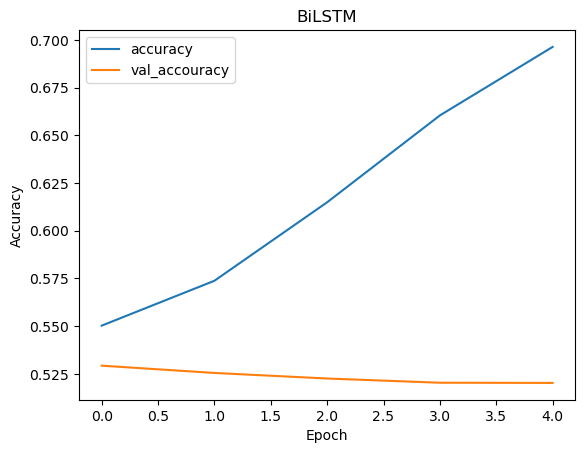

In [18]:
# plot the training and validation accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('BiLSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accouracy'], loc='upper left')

# Lấy giá trị loss và accuracy từ biến history
train_loss = history4.history['loss']
train_accuracy = history4.history['accuracy']
val_loss = history4.history['val_loss']
val_accuracy = history4.history['val_accuracy']
test_loss, test_accuracy = bi_lstm_model.evaluate(x_test, y_test, verbose=0)

# Lưu giá trị loss và accuracy vào tệp CSV hoặc cơ sở dữ liệu
results3 = pd.DataFrame({
    'Model_name': 'BiLSTM',
    'train_loss': train_loss,
    'train_accuracy': train_accuracy,
    'val_loss': val_loss,
    'val_accuracy': val_accuracy,
    'test_loss': [test_loss] * len(train_loss),  # Sử dụng len(train_loss) để lặp lại giá trị test_loss
    'test_accuracy': [test_accuracy] * len(train_accuracy),  # Sử dụng len(train_accuracy) để lặp lại giá trị test_accuracy
})

# Đọc dữ liệu cũ từ tệp CSV hoặc cơ sở dữ liệu
old_data = pd.read_csv('C:/Users/hai/DuLieuKQTN/KQTN.csv')

# Thêm dữ liệu mới vào DataFrame
new_data = pd.DataFrame(results3)

# Ghi dữ liệu mới vào tệp CSV hoặc cơ sở dữ liệu
new_data.to_csv('C:/Users/hai/DuLieuKQTN/KQTN.csv', mode='a', header=False, index=False)

#***Ghi dữ liệu thời gian huấn luyện vào csv***
# Đọc dữ liệu cũ từ tệp CSV hoặc cơ sở dữ liệu
old_time_data = pd.read_csv('C:/Users/hai/DuLieuKQTN/TimeTN.csv')

elapsed_time4 = elapsed_time4
numeric_time4 = round(elapsed_time4, 2)

# Thêm dữ liệu mới vào DataFrame
new_time_data = pd.DataFrame({
    'Model_name': 'BiLSTM',
    'elapsed_time': [numeric_time4],})

# Ghi dữ liệu mới vào tệp CSV hoặc cơ sở dữ liệu
new_time_data.to_csv('C:/Users/hai/DuLieuKQTN/TimeTN.csv', mode='a', header=False, index=False)

In [8]:
import time
# Defining Bidirectional GRU model
bi_gru_model = Sequential(name="Bidirectional_GRU")
bi_gru_model.add(Embedding(vocab_size,
							embd_len,
							input_length=max_words))
bi_gru_model.add(Bidirectional(GRU(128,
									activation='tanh',
									return_sequences=False)))
bi_gru_model.add(Dropout(0.2)) 
bi_gru_model.add(Dense(1, activation='sigmoid'))

# Printing model summary
print(bi_gru_model.summary())

# Compiling model summary
bi_gru_model.compile(
loss="binary_crossentropy",
optimizer='adam',
metrics=['accuracy']
)

start_time5 = time.time()
# Training the model
history5 = bi_gru_model.fit(x_train_, y_train_,
							batch_size=128,
							epochs=5,
							verbose=1,
							validation_data=(x_test, y_test))
end_time5 = time.time()
elapsed_time5 = end_time5 - start_time5

# Printing model score on test data
print()
print("Bidirectional GRU model Score---> ",
	bi_gru_model.evaluate(x_test, y_test, verbose=0))
print("Thời gian huấn luyện:", elapsed_time5, "giây")

Model: "Bidirectional_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              124416    
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 284,673
Trainable params: 284,673
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
311/311 [==============================] - 2872s 9s/step - loss: 0.6877 - accuracy: 0.5497 - v

NameError: name 'elapsed_time4' is not defined

In [9]:
elapsed_time5 = end_time5 - start_time5

# Printing model score on test data
print()
print("Bidirectional GRU model Score---> ",
	bi_gru_model.evaluate(x_test, y_test, verbose=0))
print("Thời gian huấn luyện:", elapsed_time5, "giây")


Bidirectional GRU model Score--->  [0.8084403276443481, 0.5121534466743469]
Thời gian huấn luyện: 10836.161125659943 giây


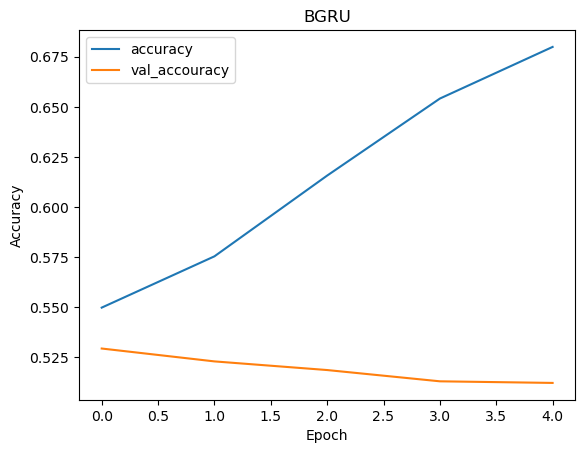

In [19]:
# plot the training and validation accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('BGRU')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accouracy'], loc='upper left')

# Lấy giá trị loss và accuracy từ biến history
train_loss = history5.history['loss']
train_accuracy = history5.history['accuracy']
val_loss = history5.history['val_loss']
val_accuracy = history5.history['val_accuracy']
test_loss, test_accuracy = bi_gru_model.evaluate(x_test, y_test, verbose=0)

# Lưu giá trị loss và accuracy vào tệp CSV hoặc cơ sở dữ liệu
results4 = pd.DataFrame({
    'Model_name': 'BGRU',
    'train_loss': train_loss,
    'train_accuracy': train_accuracy,
    'val_loss': val_loss,
    'val_accuracy': val_accuracy,
    'test_loss': [test_loss] * len(train_loss),  # Sử dụng len(train_loss) để lặp lại giá trị test_loss
    'test_accuracy': [test_accuracy] * len(train_accuracy),  # Sử dụng len(train_accuracy) để lặp lại giá trị test_accuracy
})

# Đọc dữ liệu cũ từ tệp CSV hoặc cơ sở dữ liệu
old_data = pd.read_csv('C:/Users/hai/DuLieuKQTN/KQTN.csv')

# Thêm dữ liệu mới vào DataFrame
new_data = pd.DataFrame(results4)

# Ghi dữ liệu mới vào tệp CSV hoặc cơ sở dữ liệu
new_data.to_csv('C:/Users/hai/DuLieuKQTN/KQTN.csv', mode='a', header=False, index=False)

#***Ghi dữ liệu thời gian huấn luyện vào csv***
# Đọc dữ liệu cũ từ tệp CSV hoặc cơ sở dữ liệu
old_time_data = pd.read_csv('C:/Users/hai/DuLieuKQTN/TimeTN.csv')

elapsed_time5 = elapsed_time5
numeric_time5 = round(elapsed_time5, 2)

# Thêm dữ liệu mới vào DataFrame
new_time_data = pd.DataFrame({
    'Model_name': 'BGRU',
    'elapsed_time': [numeric_time5],})

# Ghi dữ liệu mới vào tệp CSV hoặc cơ sở dữ liệu
new_time_data.to_csv('C:/Users/hai/DuLieuKQTN/TimeTN.csv', mode='a', header=False, index=False)

In [23]:
import pandas as pd

# Đọc dữ liệu từ file CSV gốc
df = pd.read_csv('C:/Users/hai/DuLieuKQTN/KQTN.csv')

# Chuyển đổi giá trị cột "value" thành phần trăm và làm tròn đến 2 chữ số
df['train_loss'] = (df['train_loss'] * 100).round(2)
df['train_accuracy'] = (df['train_accuracy'] * 100).round(2)
df['val_loss'] = (df['val_loss'] * 100).round(2)
df['val_accuracy'] = (df['val_accuracy'] * 100).round(2)
df['test_loss'] = (df['test_loss'] * 100).round(2)
df['test_accuracy'] = (df['test_accuracy'] * 100).round(2)

# Lưu dữ liệu đã chuyển đổi vào file CSV mới
df.to_csv('C:/Users/hai/DuLieuKQTN/KQTNPT.csv', index=False)